# Проект по SQL

### Описание проекта

**Цель исследования**: представить аналитический обзор рынка книг по имеющимся данным. Исследование поможет сформулировать ценностное предложение для нового продукта — приложения для тех, кто любит читать.

**Задачи и ход исследования:**
- Определить, сколько книг вышло после 1 января 2000 года;
- Посчитать количество обзоров и среднюю оценку для каждой книги;
- Определить издательство, которое выпускает наибольшее количество книг;
- Найти автора с самой высокой средней оценкой книг;
- Посчитать количество обзоров от пользователей.

**Описание данных**:

**Таблица `books`** cодержит данные о книгах:
- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`** cодержит данные об авторах:
- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`** cодержит данные об издательствах:
- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства.

**Таблица `ratings`** cодержит данные о пользовательских оценках книг:
- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`** cодержит данные о пользовательских обзорах на книги:
- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

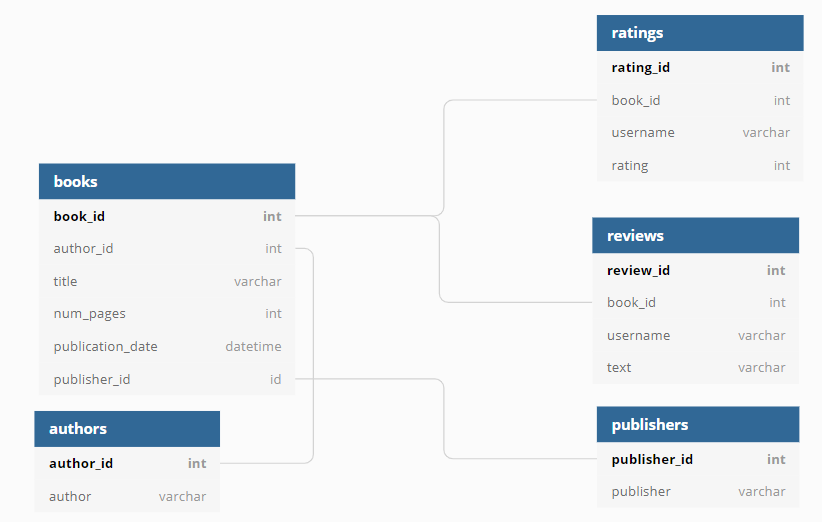

### Загрузка данных

In [1]:
# импортируем библиотеки
import pandas as pd
import sqlalchemy as sa
# устанавливаем параметры
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-final-project-db' # название базы данных
}
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)
# сохраняем коннектор
engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})
# чтобы выполнить SQL-запрос, пишем функцию с использованием Pandas
def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    '''Открываем соединение, получаем данные из sql, закрываем соединение'''
    with engine.connect() as con:
        return pd.read_sql(sql=sa.text(query), con = con)

### Вывод таблиц

In [2]:
# Список названий таблиц
table_names = ['books', 'authors', 'publishers', 'ratings', 'reviews']

# Цикл для вывода первых 5 строк и подсчета количества строк для каждой таблицы
for table_name in table_names:
    query = f"SELECT * FROM {table_name}"
    data = get_sql_data(query)
    row_count = len(data)
    
    print(f"Первые 5 строк таблицы {table_name}:")
    display(data.head())
    print(f"Количество строк в таблице {table_name}: {row_count}\n")

Первые 5 строк таблицы books:


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


Количество строк в таблице books: 1000

Первые 5 строк таблицы authors:


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


Количество строк в таблице authors: 636

Первые 5 строк таблицы publishers:


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


Количество строк в таблице publishers: 340

Первые 5 строк таблицы ratings:


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


Количество строк в таблице ratings: 6456

Первые 5 строк таблицы reviews:


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


Количество строк в таблице reviews: 2793



### Количество книг, выпущенных после 1 января 2020 года

In [3]:
# запрос
query_books_count = '''
    SELECT COUNT(*) AS total_books
    FROM books
    WHERE publication_date >= '2000-01-01';
    '''

# вывод результата
get_sql_data(query_books_count)

,total_books
0,821


C 1 января 2000 года была выпущена 821 книга.

### Количество обзоров и средняя оценка книг

In [4]:
# запрос
query_review_and_rating = '''
    SELECT b.book_id, 
           b.title AS title, 
           COUNT(DISTINCT rv.review_id) AS review_count, 
           ROUND(AVG(r.rating),2) AS average_rating
    FROM books AS b
    LEFT JOIN reviews AS rv ON b.book_id = rv.book_id
    LEFT JOIN  ratings AS r ON b.book_id = r.book_id
    GROUP BY b.book_id
    ORDER BY review_count DESC, average_rating DESC
    '''

# вывод результата
get_sql_data(query_review_and_rating)

,book_id,title,review_count,average_rating
0,948,Twilight (Twilight #1),7,3.66
1,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.41
2,299,Harry Potter and the Chamber of Secrets (Harry...,6,4.29
3,656,The Book Thief,6,4.26
4,734,The Glass Castle,6,4.21
...,...,...,...,...
995,191,Disney's Beauty and the Beast (A Little Golden...,0,4.00
996,387,Leonardo's Notebooks,0,4.00
997,221,Essential Tales and Poems,0,4.00
998,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67


Больше всего отзывов у книги Twilight (7 отзывов) со средним рейтингом 3.66.

### Издательство, которое выпускает наибольшее количество книг

In [5]:
# запрос
query_publisher_with_most_books = '''
    SELECT p.publisher,
           COUNT(b.book_id) AS books_count
    FROM publishers p
    JOIN books b ON p.publisher_id = b.publisher_id
    WHERE b.num_pages > 50
    GROUP BY p.publisher
    ORDER BY books_count DESC
    LIMIT 1;
    '''

# вывод результата
get_sql_data(query_publisher_with_most_books)

,publisher,books_count
0,Penguin Books,42


Больше всего книг выпустило издательство Penguin Books.

### Автор с самой высокой средней оценкой книг

In [7]:
# запрос 
new_query_author_with_highest_average_rating = '''
    WITH author_rating AS (
        SELECT a.author,
               b.book_id,
               AVG(r.rating) AS average_rating
        FROM authors a
        JOIN books b ON a.author_id = b.author_id
        JOIN ratings r ON b.book_id = r.book_id
        GROUP BY a.author, b.book_id
        HAVING COUNT(r.rating) >= 50
    )
    SELECT author, round(AVG(average_rating), 2) AS highest_avg_author_rating
    FROM author_rating
    GROUP BY author
    ORDER BY highest_avg_author_rating DESC
    LIMIT 1;
    '''

# вывод результата
get_sql_data(new_query_author_with_highest_average_rating)

,author,highest_avg_author_rating
0,J.K. Rowling/Mary GrandPré,4.28


Самый высокий средний рейтинг у J.K. Rowling/Mary GrandPré.

### Количество обзоров от пользователей

In [8]:
# запрос
query_average_review_count = '''
    SELECT AVG(subquery.review_count) AS average_review_count
    FROM (
        SELECT r.username,
               COUNT(r.review_id) AS review_count
        FROM reviews r
        WHERE r.username IN (
            SELECT username
            FROM ratings
            GROUP BY username
            HAVING COUNT(rating) > 48
        )
        GROUP BY r.username
    ) AS subquery;
    '''

# вывод результата
get_sql_data(query_average_review_count)

,average_review_count
0,24.0


Среднее количество обзоров от пользователей, которые поставили больше 48 оценок — 24.

### Выводы

- C 1 января 2000 года была выпущена 821 книга.
- Больше всего отзывов у книги Twilight (7) со средним рейтингом 3.66.
- Больше всего книг выпустило издательство Penguin Books — 42.
- Самый высокий средний рейтинг у J.K. Rowling/Mary GrandPré — 4.41.
- Среднее количество обзоров от пользователей, которые поставили больше 48 оценок — 24.